# Mandrill
Authors: [RedSkittleFox](https://github.com/RedSkittleFox), [DJAltair](https://github.com/DJAltair)

# Get the Data

In [1]:
import openpyxl

workbook = openpyxl.load_workbook("data/mandrill.xlsx")
good = workbook.active

for row in range(1, 151):
    for col in good.iter_cols(1, good.max_column):
        print(col[row].value)

print("\n")

bad = workbook["dot. innych"]

for row in range(1, 151):
    for col in bad.iter_cols(1, bad.max_column):
        print(col[row].value)


[blog] Using Nullmailer and Mandrill for your Ubuntu Linux server outboud mail:  http://bit.ly/ZjHOk7  #plone
[blog] Using Postfix and free Mandrill email service for SMTP on Ubuntu Linux server:  http://bit.ly/11HmDZz  #plone
@aalbertson There are several reasons emails go to spam. Mind submitting a request at http://help.mandrill.com  with additional details?
@adrienneleigh I just switched it over to Mandrill, let's see if that improve the speed at which the emails are sent.
@ankeshk +1 to @mailchimp We use MailChimp for marketing emails and their Mandrill app for txn emails... @sampad @abhijeetmk @hiway
@biggoldring That error may occur if unsupported auth method used. Can you email us via http://help.mandrill.com  so we can get details?
@BlueHayes mind sending us some details about your account via http://help.mandrill.com  ? Things look correct here but we may need some detail
@cemsisman It can vary, but if sending really low volumes, may not be worth it. Can offer detail - submit

c:\Users\fox\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Create a DataFrame

In [2]:
import pandas as pd
df = pd.DataFrame(columns=["original", "good"])

for row in range(1, 151):
    for col in good.iter_cols(1, good.max_column):
        df = pd.concat([df, pd.DataFrame([{"original" : col[row].value, "good" : True}]) ], ignore_index = True)
        
for row in range(1, 151):
    for col in bad.iter_cols(1, bad.max_column):
        df = pd.concat([df, pd.DataFrame([{"original" : col[row].value, "good" : False}]) ], ignore_index = True)

df

,original,good
0,[blog] Using Nullmailer and Mandrill for your ...,True
1,[blog] Using Postfix and free Mandrill email s...,True
2,@aalbertson There are several reasons emails g...,True
3,@adrienneleigh I just switched it over to Mand...,True
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True
...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False
296,You can now experience the thrills of classic ...,False
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False


# Preparte the data

## Translate

In [3]:
from langdetect import detect
import translators as ts
import os

if os.path.exists("data/translated_snapshot.pkl") == False:
    df["language"] = ""
    df["translated"] = df["original"].copy()
    for index, row in df.iterrows():
        lang = row["original"]
        df["language"][index] = detect(lang)
        if df["language"][index] != 'en':
            df["translated"][index] = ts.translate_text(row["original"], translator="google")
        
        print(df["translated"][index])

    df.to_pickle("data/translated_snapshot.pkl")
else:
    df = pd.read_pickle("data/translated_snapshot.pkl")

In [4]:
df

,original,good,language,translated
0,[blog] Using Nullmailer and Mandrill for your ...,True,en,[blog] Using Nullmailer and Mandrill for your ...
1,[blog] Using Postfix and free Mandrill email s...,True,en,[blog] Using Postfix and free Mandrill email s...
2,@aalbertson There are several reasons emails g...,True,en,@aalbertson There are several reasons emails g...
3,@adrienneleigh I just switched it over to Mand...,True,en,@adrienneleigh I just switched it over to Mand...
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True,en,@ankeshk +1 to @mailchimp We use MailChimp for...
...,...,...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False,en,Why Are Monkey Butts So Colorful?: Mandrill Wi...
296,You can now experience the thrills of classic ...,False,en,You can now experience the thrills of classic ...
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False,ja,"75 years of Mandrill, a boiled band of genre! ..."
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False,ja,B1 with a heavy bass and Spacey synths on perc...


## Has URL / Has mandrill URL

In [5]:
import re

df["has url"] = False
df["has mandrill url"] = False

f = re.search(r'http[s]*:\/\/(?:[a-z0-9_\-]+[.])*(?:mandrill.com)(?:\/[a-zA-Z\-\/0-9]+)*', 
              r'@mandrillapp could you add the defaults (if any) to your SMTP header docs? http://help.mandrill.com/entries/21688056-Using-SMTP-Headers-to-customize-your-messages … Thanks!')

if f == None:
    raise "Bad regex"

for index, row in df.iterrows():
    og = row["original"]
    f = re.search(r'http[s]*:\/\/(?:[a-z0-9_\-]+[.])*(?:mandrill.com)(?:\/[a-zA-Z\-\/0-9]+)*', og, flags=re.IGNORECASE)
    url_f = re.search(r'http[s]*:\/\/', og, flags=re.IGNORECASE)
    if(f != None):
        df["has mandrill url"][index] = True
    if(url_f != None):
        df["has url"][index] = True

df

C:\Users\fox\AppData\Local\Temp\ipykernel_33484\27535148.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has url"][index] = True
C:\Users\fox\AppData\Local\Temp\ipykernel_33484\27535148.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has url"][index] = True
C:\Users\fox\AppData\Local\Temp\ipykernel_33484\27535148.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has mandrill url"][index] = True
C:\Users\fox\App

,original,good,language,translated,has url,has mandrill url
0,[blog] Using Nullmailer and Mandrill for your ...,True,en,[blog] Using Nullmailer and Mandrill for your ...,True,False
1,[blog] Using Postfix and free Mandrill email s...,True,en,[blog] Using Postfix and free Mandrill email s...,True,False
2,@aalbertson There are several reasons emails g...,True,en,@aalbertson There are several reasons emails g...,True,True
3,@adrienneleigh I just switched it over to Mand...,True,en,@adrienneleigh I just switched it over to Mand...,False,False
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True,en,@ankeshk +1 to @mailchimp We use MailChimp for...,False,False
...,...,...,...,...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False,en,Why Are Monkey Butts So Colorful?: Mandrill Wi...,True,False
296,You can now experience the thrills of classic ...,False,en,You can now experience the thrills of classic ...,True,False
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False,ja,"75 years of Mandrill, a boiled band of genre! ...",True,False
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False,ja,B1 with a heavy bass and Spacey synths on perc...,True,False


## Explore most common @s (at me)

In [6]:
ats = {}

for index, row in df.iterrows():
    og = row["original"]
    fl = re.findall(r'(?:@[a-zA-Z0-9_]+\b)', og, flags=re.IGNORECASE)

    if len(fl) != 0:
        for f in fl:
            lower = f.lower()
            if lower in ats:
                ats[lower] = ats[lower] + 1
            else:
                ats[lower] = 1

ats = list(ats.items())
ats.sort(key = lambda x : x[1], reverse=True)
ats

[('@mandrill', 43),
 ('@youtube', 15),
 ('@mandrillapp', 14),
 ('@smoothmcgroove', 9),
 ('@mailchimp', 6),
 ('@camj59', 5),
 ('@chrislema', 5),
 ('@sendgrid', 4),
 ('@ccpgames', 4),
 ('@freebooted', 4),
 ('@devongovett', 3),
 ('@eladlouni', 3),
 ('@sinue', 3),
 ('@missmya', 3),
 ('@whistlerbean', 3),
 ('@dzuelke', 2),
 ('@elie__', 2),
 ('@nathansmith', 2),
 ('@kelduum', 2),
 ('@webspaceships', 2),
 ('@maxursa', 2),
 ('@ccp_guard', 2),
 ('@aalbertson', 1),
 ('@adrienneleigh', 1),
 ('@ankeshk', 1),
 ('@sampad', 1),
 ('@abhijeetmk', 1),
 ('@hiway', 1),
 ('@biggoldring', 1),
 ('@bluehayes', 1),
 ('@cemsisman', 1),
 ('@compactcode', 1),
 ('@edocr', 1),
 ('@ericcandino', 1),
 ('@flo_rian', 1),
 ('@frankioh', 1),
 ('@gidogeek', 1),
 ('@guillaumepotier', 1),
 ('@icntmx', 1),
 ('@jeremyweir', 1),
 ('@josscrowcroft', 1),
 ('@juanpabloaj', 1),
 ('@kanonbulle', 1),
 ('@kennydude', 1),
 ('@kennyfraser', 1),
 ('@khiger', 1),
 ('@ljharb', 1),
 ('@manojranaweera', 1),
 ('@marcelosomers', 1),
 ('@masug

Detect the most popular tags that don't belong to private people:
@mandrill
@youtube
@mandrillapp
@smoothmcgroove
@mailchimp

## Has tag @mandrill @youtube @mandrillapp @smoothmcgroove @mailchimp

In [7]:
import re

def has_tag(tag, row):
    og = row["original"]
    f = re.search(f'(?:@{tag}\\b)', og, flags=re.IGNORECASE)
    return f != None

for tag in ["mandrill", "youtube", "mandrillapp", "smoothmcgroove", "mailchimp"]:
    df[f"has @{tag}"] = df.apply(lambda row : has_tag(tag, row), axis = 1)

df.to_csv(path_or_buf="data/test.csv", sep=';')
df


,original,good,language,translated,has url,has mandrill url,has @mandrill,has @youtube,has @mandrillapp,has @smoothmcgroove,has @mailchimp
0,[blog] Using Nullmailer and Mandrill for your ...,True,en,[blog] Using Nullmailer and Mandrill for your ...,True,False,False,False,False,False,False
1,[blog] Using Postfix and free Mandrill email s...,True,en,[blog] Using Postfix and free Mandrill email s...,True,False,False,False,False,False,False
2,@aalbertson There are several reasons emails g...,True,en,@aalbertson There are several reasons emails g...,True,True,False,False,False,False,False
3,@adrienneleigh I just switched it over to Mand...,True,en,@adrienneleigh I just switched it over to Mand...,False,False,False,False,False,False,False
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True,en,@ankeshk +1 to @mailchimp We use MailChimp for...,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False,en,Why Are Monkey Butts So Colorful?: Mandrill Wi...,True,False,False,False,False,False,False
296,You can now experience the thrills of classic ...,False,en,You can now experience the thrills of classic ...,True,False,False,False,False,False,False
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False,ja,"75 years of Mandrill, a boiled band of genre! ...",True,False,False,False,False,False,False
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False,ja,B1 with a heavy bass and Spacey synths on perc...,True,False,False,False,False,False,False


## Explore most common #tags

In [8]:
ats = {}

for index, row in df.iterrows():
    og = row["original"]
    fl = re.findall(r'(?:#[a-zA-Z0-9_\-]+\b)', og, flags=re.IGNORECASE)

    if len(fl) != 0:
        for f in fl:
            lower = f.lower()
            if lower in ats:
                ats[lower] = ats[lower] + 1
            else:
                ats[lower] = 1

ats = list(ats.items())
ats.sort(key = lambda x : x[1], reverse=True)
ats

[('#mandrill', 8),
 ('#freelance', 7),
 ('#job', 7),
 ('#jobs', 4),
 ('#php', 3),
 ('#drupal', 3),
 ('#javascript', 3),
 ('#nameanamazingband', 3),
 ('#tweetfleet', 3),
 ('#nowplaying', 3),
 ('#plone', 2),
 ('#wordpress', 2),
 ('#wcmelb', 2),
 ('#jquery', 2),
 ('#eecms', 2),
 ('#interspire', 2),
 ('#spotify', 2),
 ('#listenlive', 2),
 ('#animalcelebrities', 2),
 ('#enginehosting', 1),
 ('#selfinducedcannibalization', 1),
 ('#howto', 1),
 ('#internetmarketing', 1),
 ('#freelancer', 1),
 ('#project', 1),
 ('#jobs4u', 1),
 ('#atl', 1),
 ('#atlanta', 1),
 ('#ga', 1),
 ('#mysql', 1),
 ('#newsletters', 1),
 ('#sendgrid', 1),
 ('#wp', 1),
 ('#plugins', 1),
 ('#plugin', 1),
 ('#photoshopdesign', 1),
 ('#templates', 1),
 ('#buddypress', 1),
 ('#logo', 1),
 ('#design', 1),
 ('#redhen', 1),
 ('#dev', 1),
 ('#timetomoveon', 1),
 ('#transactional', 1),
 ('#career', 1),
 ('#edocr', 1),
 ('#bjcbranding', 1),
 ('#linux', 1),
 ('#python', 1),
 ('#lightweight', 1),
 ('#integration', 1),
 ('#22', 1),
 ('

Select the most interesting #tags
#mandrill
#freelance
#job
#jobs

## Has #mandrill #freelance #job #jobs

In [9]:
import re

def has_tag(tag, row):
    og = row["original"]
    f = re.search(f'(?:#{tag}\\b)', og, flags=re.IGNORECASE)
    return f != None

for tag in ["mandrill", "freelance"]:
    df[f"has #{tag}"] = df.apply(lambda row : has_tag(tag, row), axis = 1)

def has_job(row):
    og = row["original"]
    f = re.search(f'(?:#job[s]*\\b)', og, flags=re.IGNORECASE)
    return f != None

df[f"has #job"] = df.apply(lambda row : has_job(row), axis = 1)

df

,original,good,language,translated,has url,has mandrill url,has @mandrill,has @youtube,has @mandrillapp,has @smoothmcgroove,has @mailchimp,has #mandrill,has #freelance,has #job
0,[blog] Using Nullmailer and Mandrill for your ...,True,en,[blog] Using Nullmailer and Mandrill for your ...,True,False,False,False,False,False,False,False,False,False
1,[blog] Using Postfix and free Mandrill email s...,True,en,[blog] Using Postfix and free Mandrill email s...,True,False,False,False,False,False,False,False,False,False
2,@aalbertson There are several reasons emails g...,True,en,@aalbertson There are several reasons emails g...,True,True,False,False,False,False,False,False,False,False
3,@adrienneleigh I just switched it over to Mand...,True,en,@adrienneleigh I just switched it over to Mand...,False,False,False,False,False,False,False,False,False,False
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True,en,@ankeshk +1 to @mailchimp We use MailChimp for...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False,en,Why Are Monkey Butts So Colorful?: Mandrill Wi...,True,False,False,False,False,False,False,False,False,False
296,You can now experience the thrills of classic ...,False,en,You can now experience the thrills of classic ...,True,False,False,False,False,False,False,False,False,False
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False,ja,"75 years of Mandrill, a boiled band of genre! ...",True,False,False,False,False,False,False,False,False,False
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False,ja,B1 with a heavy bass and Spacey synths on perc...,True,False,False,False,False,False,False,False,False,False


# Process text

In [10]:
import spacy
import inflect
p = inflect.engine()

en = spacy.load("en_core_web_lg")
stop_list = en.Defaults.stop_words

def split_translated(row):
    translated = row["translated"]
    split = translated.split()

    # To lower case
    split = list(map(lambda s : s.lower(), split))

    # Remove urls
    split = [s for s in split if re.search(r'http[s]*:\/\/', s, flags=re.IGNORECASE) == None]

    # Remove tags
    split = [s for s in split if not ('#' in s)]

    # Remove @
    split = [s for s in split if not ('@' in s)]

    # Remove everything that contains digits
    split = [s for s in split if not re.search(r'[0-9]', s) != None]

    # Remove non-alphanumeric bs
    split = list(map(lambda s : ''.join(ch for ch in s if ch.isalpha()), split))

    # Remove spaces
    split = list(map(lambda s : s.strip(), split))

    # Remove stop-list
    split = [s for s in split if not s in stop_list]

    # Remove empty
    split = [s for s in split if len(s) != 0]

    def to_singular(s):
        singular = p.singular_noun(s)
        if singular == False:
            return s
        return singular

    split = list(map(to_singular, split))

    return split

df[f"split"] = df.apply(lambda row : split_translated(row), axis = 1)
df["split"]

0      [blog, nullmailer, mandrill, ubuntu, linux, se...
1      [blog, postfix, free, mandrill, email, service...
2      [reason, email, spam, mind, submitting, reques...
3      [switched, mandrill, let, improve, speed, emai...
4      [use, mailchimp, marketing, email, mandrill, a...
                             ...                        
295    [monkey, butt, colorful, mandrill, wikimedia, ...
296    [experience, thrill, classic, pc, gaming, mand...
297    [year, mandrill, boiled, band, genre, recommen...
298    [heavy, bas, spacey, synth, percussive, beat, ...
299    [rare, groove, break, classic, nottz, feat, pe...
Name: split, Length: 300, dtype: object

## Count number of occurences of each word

In [11]:
from collections import Counter

big_list = []

for index, row in df.iterrows():
    l = row["split"]
    big_list = big_list + l

counted = [*Counter(big_list).items()]
counted

[('blog', 4),
 ('nullmailer', 2),
 ('mandrill', 187),
 ('ubuntu', 3),
 ('linux', 2),
 ('server', 3),
 ('outboud', 2),
 ('mail', 4),
 ('postfix', 1),
 ('free', 3),
 ('email', 44),
 ('service', 16),
 ('smtp', 7),
 ('reason', 4),
 ('spam', 2),
 ('mind', 12),
 ('submitting', 10),
 ('request', 16),
 ('additional', 4),
 ('detail', 18),
 ('switched', 1),
 ('let', 3),
 ('improve', 1),
 ('speed', 1),
 ('sent', 2),
 ('use', 11),
 ('mailchimp', 19),
 ('marketing', 3),
 ('app', 5),
 ('txn', 1),
 ('error', 2),
 ('occur', 1),
 ('unsupported', 1),
 ('auth', 1),
 ('method', 2),
 ('sending', 6),
 ('account', 10),
 ('thing', 5),
 ('look', 9),
 ('correct', 1),
 ('need', 7),
 ('vary', 1),
 ('low', 1),
 ('volume', 2),
 ('worth', 3),
 ('offer', 1),
 ('submit', 6),
 ('checked', 1),
 ('transactional', 13),
 ('run', 1),
 ('im', 7),
 ('saving', 1),
 ('issue', 8),
 ('domain', 2),
 ('getting', 1),
 ('blocked', 1),
 ('bounce', 6),
 ('message', 2),
 ('hard', 1),
 ('debug', 1),
 ('pretty', 2),
 ('cheap', 2),
 ('opti

## Erase words that only occur once

In [12]:
# counted = [s for s in counted if s[1] != 1]
# counted

## Update dataframe with the words

In [13]:
def has_word(word, row):
    splt = row["split"]
    return word in splt

for word, count in counted:
    df[f"_{word}"] = df.apply(lambda row : has_word(word, row), axis = 1)

df.to_csv(path_or_buf="data/test.csv", sep=';')
df

C:\Users\fox\AppData\Local\Temp\ipykernel_33484\988477245.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"_{word}"] = df.apply(lambda row : has_word(word, row), axis = 1)
C:\Users\fox\AppData\Local\Temp\ipykernel_33484\988477245.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"_{word}"] = df.apply(lambda row : has_word(word, row), axis = 1)
C:\Users\fox\AppData\Local\Temp\ipykernel_33484\988477245.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

,original,good,language,translated,has url,has mandrill url,has @mandrill,has @youtube,has @mandrillapp,has @smoothmcgroove,...,_drum,_mandrillgetting,_mood,_rare,_break,_nottz,_feat,_pete,_turn,_mandrillmango
0,[blog] Using Nullmailer and Mandrill for your ...,True,en,[blog] Using Nullmailer and Mandrill for your ...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,[blog] Using Postfix and free Mandrill email s...,True,en,[blog] Using Postfix and free Mandrill email s...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,@aalbertson There are several reasons emails g...,True,en,@aalbertson There are several reasons emails g...,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,@adrienneleigh I just switched it over to Mand...,True,en,@adrienneleigh I just switched it over to Mand...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,@ankeshk +1 to @mailchimp We use MailChimp for...,True,en,@ankeshk +1 to @mailchimp We use MailChimp for...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Why Are Monkey Butts So Colorful?: Mandrill Wi...,False,en,Why Are Monkey Butts So Colorful?: Mandrill Wi...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
296,You can now experience the thrills of classic ...,False,en,You can now experience the thrills of classic ...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,ジャンルごった煮のバンド、Mandrillの75年作！オススメはOddiseeがサンプリング...,False,ja,"75 years of Mandrill, a boiled band of genre! ...",True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,パーカッシヴなビートに重厚なベースやスペイシーなシンセ等が絡むB1が◎な80年の好作！シッカ...,False,ja,B1 with a heavy bass and Spacey synths on perc...,True,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [14]:
# Shuffle
df = df.sample(frac=1).reset_index(drop=True)
df

,original,good,language,translated,has url,has mandrill url,has @mandrill,has @youtube,has @mandrillapp,has @smoothmcgroove,...,_drum,_mandrillgetting,_mood,_rare,_break,_nottz,_feat,_pete,_turn,_mandrillmango
0,"From Coworker about using Mandrill: ""I would ...",True,en,"From Coworker about using Mandrill: ""I would ...",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"@mandrillapp tried refreshing, the link (line ...",True,en,"@mandrillapp tried refreshing, the link (line ...",True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,This week: move TDP to either DigitalOcean or ...,True,en,This week: move TDP to either DigitalOcean or ...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,this little girl is a mandrill. Milwaukee Coun...,False,en,this little girl is a mandrill. Milwaukee Coun...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,#Job Integrate Mandrill or Send Grid with Ecom...,True,en,#Job Integrate Mandrill or Send Grid with Ecom...,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,@As_TomasRoncero a la mierda el mandrill tocat...,False,es,@As_tomasroncero to shit the mandrill touch yo...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
296,Le mandrill se casse #instantchiale,False,it,Le mandrill if #ininintantchiale drawers,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,@EricCandino They're unfortunately not for sal...,True,en,@EricCandino They're unfortunately not for sal...,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,@mandrill @Freebooted. I want to say Heinlein ...,False,en,@mandrill @Freebooted. I want to say Heinlein ...,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Naive Bayes Classifier
Naive Bayes Classifier is a simplification of the more accurate Bayes Classifier. It assumes that all the attributes in the dataset are independent of each other. That assumption allows us to make the following simplification:
$$
Pr(X | C_i) = Pr(x_1, \dots, x_k, \dots, x_n | C_i) = \prod_{k = 1}^n Pr(x_k | C_i)
$$
The goal is to solve the following equation
$$
C^* = \arg \max_{C_i : i \geq 1} (Pr(X|C_i) \cdot Pr(C_i)) = \arg \max_{C_i : i \geq 1} (Pr(C_i) \prod_{k = 1}^n Pr(x_k | C_i))
$$
In the next step we estimate $Pr(C_i)$ and $Pr(x_k | C_i)$ 
$$
Pr(C_i) = \frac{|C_i|}{|Z|}
$$
$$
Pr(x_k | C_i) = \frac{|C_i^{x_k}|}{|C_i|}
$$
Some situations will yield the null probability and thus we need to use the Laplace's smoothing to account for that.
$$
Pr(C_i) = \frac{|C_i| + \lambda }{|Z| + \lambda \cdot m} \quad i = 1, \dots, m
$$
$$
Pr(x_k | C_i) = \frac{|C_i^{x_k}| + \lambda}{|C_i| + \lambda \cdot |x_k|} \quad i = 1, \dots, n
$$

## Implementation

In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder
import numpy as np

class NaiveBayessClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, laplace_smoothing = False, verbose = True):
        self.laplace_smoothing = laplace_smoothing
        self.verbose = verbose
    def fit(self, X, y, categories = None):
        if categories == None:
            ohe = OneHotEncoder()
            ohe.fit(X)
            self.x_categories_ = ohe.categories_.copy()
        else:
            self.x_categories_ = categories

        ohe = OneHotEncoder()
        ohe.fit(pd.DataFrame(y))
        self.y_categories = ohe.categories_[0].copy()

        og_columns = X.columns.copy()

        self.prob_data = {}
        self.prob_y = {}

        for p in self.y_categories:
            count = len(y)
            cat_count = 0
            for row in y.to_numpy():
                if(row == p):
                    cat_count = cat_count + 1    
            
            prob = 0.0
            if self.laplace_smoothing == False:
                prob = float(cat_count) / float(count)
            else:
                m = len(self.y_categories) 
                prob = (float(cat_count) + 1.0) / (float(count) + m)

            self.prob_y[f"{p}"] = prob

            self.prob_data[f"{p}"] = {}
            for c in og_columns:
                for cat in self.x_categories_[X.columns.get_loc(c)]:
                    count = 0
                    cat_count = 0
                    for index, row in X.iterrows():
                        if(y.to_numpy()[int(index)] != p):
                            continue
                        count = count + 1
                        if(row[c] == cat):
                            cat_count += 1

                    prob = 0.0
                    if self.laplace_smoothing == False:
                        prob = float(cat_count) / float(count)
                    else:
                        m = len(self.x_categories_[X.columns.get_loc(c)])
                        prob = (float(cat_count) + 1) / (float(count) + m)

                    self.prob_data[f"{p}"][f"{c}={cat}"] = prob

                    None

        if self.verbose:
            print(self.prob_data)

        return self

    def predict(self, X):
        results = np.array([*range(0, len(X))], dtype=object)
        for i, row in X.iterrows():
            v = {}
            for y_cat in self.y_categories:
                v[y_cat] = self.prob_y[f"{y_cat}"] 
                out = f"{y_cat} : ({y_cat}){v[y_cat]} * "
                for x_label in X.columns:
                    d = self.prob_data[f'{y_cat}']
                    f = self.prob_data[f"{y_cat}"][f"{x_label}={row[x_label]}"]
                    v[y_cat] = v[y_cat] * f
                    out = out + f" {x_label}({f}) *"
            
                out = out[:-1]
                out = out + f"= {v[y_cat]}"
                if self.verbose:
                    print(out)
            

            m = max(v, key=v.get)
            results[i] = m
            
            if self.verbose:
                print(f"max(p) = {m}")
        return results

## Training

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df.drop(["original", "good", "translated", "split"], axis=1)
def translate(row):
    if row["good"]:
        return "good"
    return "bad"

Y = df[["good"]].apply(translate, axis=1).copy()

from sklearn import model_selection

splits = model_selection.train_test_split(X, Y, test_size=.2, random_state=0)
X_train, X_test, y_train, y_test = splits

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [17]:
ohe = OneHotEncoder()
ohe.fit(X)
cats = ohe.categories_.copy()

kNN = NaiveBayessClassifier(laplace_smoothing=True, verbose = False)
kNN.fit(X_train, y_train, categories=cats)

NaiveBayessClassifier(laplace_smoothing=True, verbose=False)

## Evaluation

Bayessian score : 0.9833333333333333
Bayessian score : 0.9


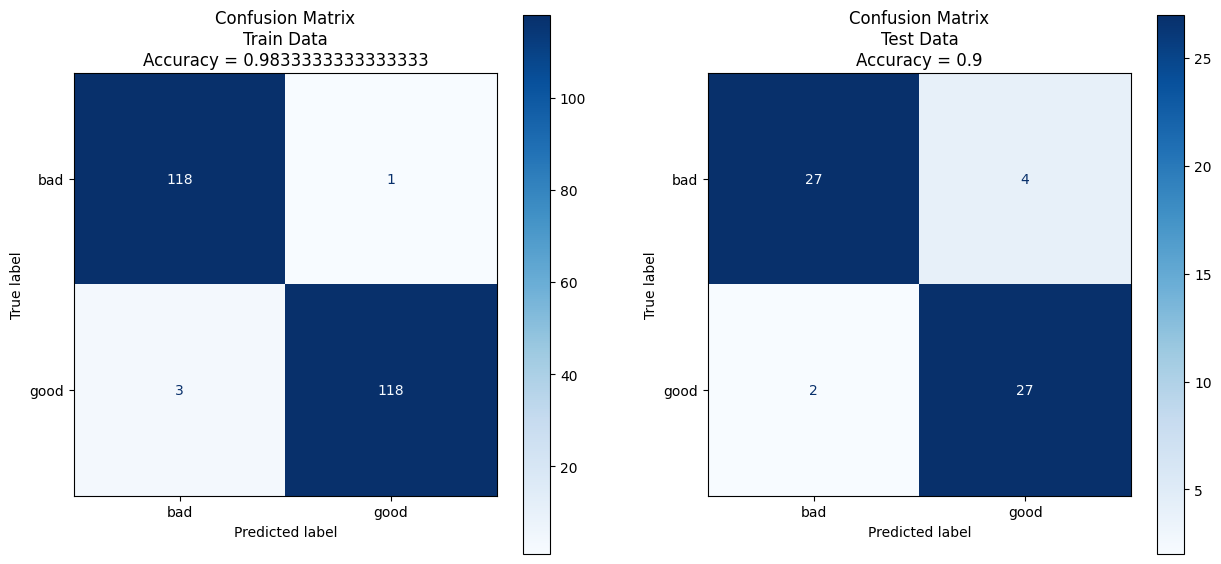

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for x, y in [(X_train, y_train)]: 
    Y_pred = kNN.predict(x)
    score = accuracy_score(y, Y_pred)

    print(f"Bayessian score : {score}")
    mat = confusion_matrix(y, Y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true = y, 
        y_pred = Y_pred,
        cmap=plt.cm.Blues,
        labels=kNN.y_categories,
        ax = axs[0]
    )

    disp.ax_.set_title(f"Confusion Matrix\nTrain Data\nAccuracy = {score}")
    
for x, y in [(X_test, y_test)]: 
    Y_pred = kNN.predict(x)
    score = accuracy_score(y, Y_pred)

    print(f"Bayessian score : {score}")
    mat = confusion_matrix(y, Y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true = y, 
        y_pred = Y_pred,
        cmap=plt.cm.Blues,
        labels=kNN.y_categories,
        ax = axs[1]
    )

    disp.ax_.set_title(f"Confusion Matrix\nTest Data\nAccuracy = {score}")

plt.show()